<a href="https://colab.research.google.com/github/asma-h99/Handwritten_Digit_Recognition/blob/main/Handwritten_Digit_Recognition_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import cv2
import os
from keras.models import Sequential
from keras.layers import Dense, Activation
from google.colab import drive


In [62]:
mnist=tf.keras.datasets.mnist

 x_train represents the input images (handwritten digits), and y_train represents the corresponding labels (the actual digit each image represents).

(x_test, y_test): This is likely where the testing data is being stored. Similar to the training data, x_test holds the test images, and y_test holds the corresponding labels.

In [63]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

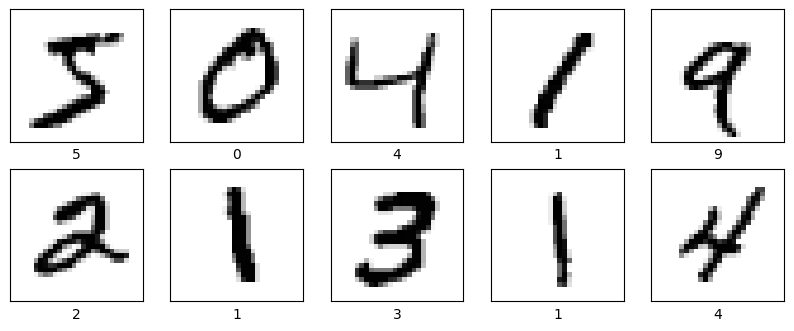

In [64]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

We will normalize the pixels

In [65]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)

In [66]:
model= tf.keras.models.Sequential()

In [67]:
from keras.src.layers.reshaping.flatten import Flatten
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

In [68]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [69]:
model.fit(x_train, y_train)

1875/1875 [==============================] - 9s 4ms/step - loss: 0.2604 - accuracy: 0.9231


In [70]:
loss , accuracy=model.evaluate(x_test , y_test)

print(f"The accuracy of the model is = {accuracy}")
print(f'The loss of the model is = {loss}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1313 - accuracy: 0.9589
The accuracy of the model is = 0.958899974822998
The loss of the model is = 0.13132061064243317


In [75]:
image_num = 1

In [76]:
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/digits'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 60ms/step
This digit is probably a 2


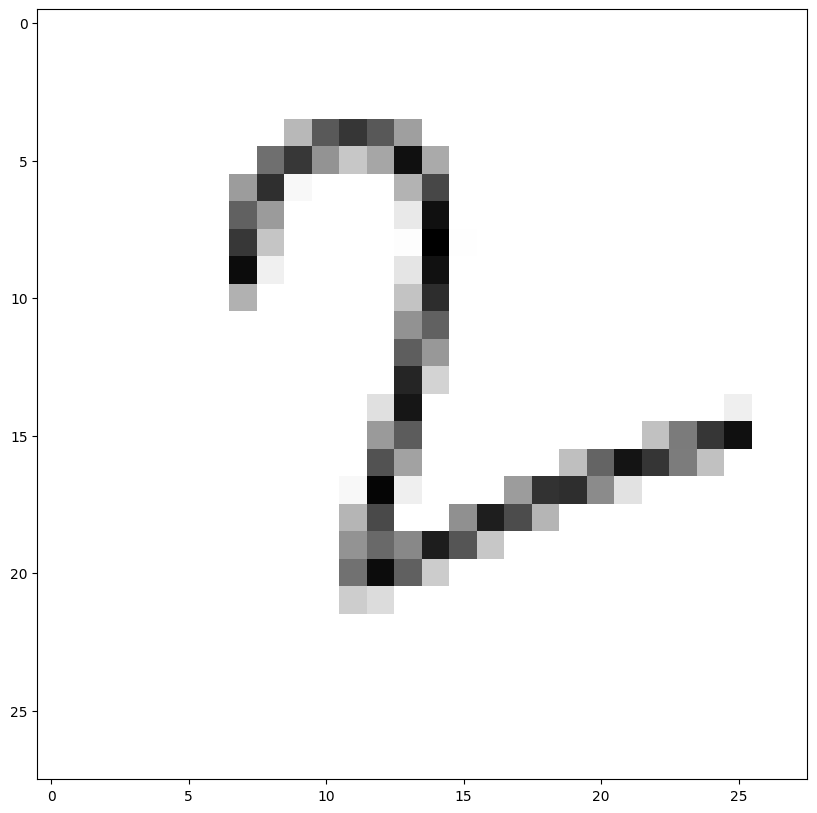

1/1 [==============================] - 0s 19ms/step
This digit is probably a 3


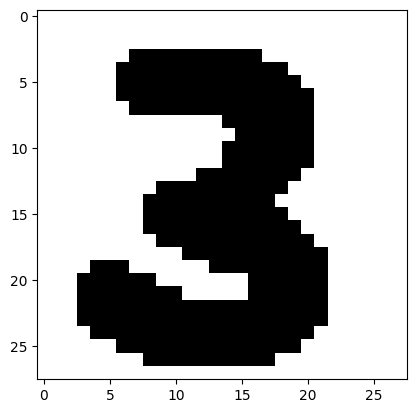

1/1 [==============================] - 0s 21ms/step
This digit is probably a 3


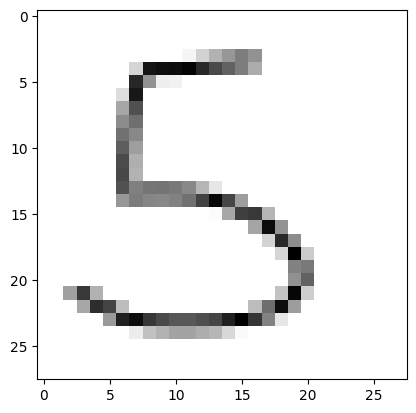

1/1 [==============================] - 0s 20ms/step
This digit is probably a 8


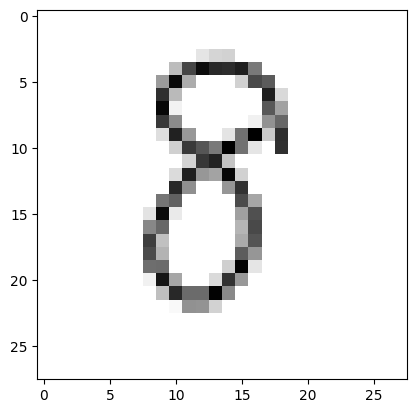

1/1 [==============================] - 0s 21ms/step
This digit is probably a 8


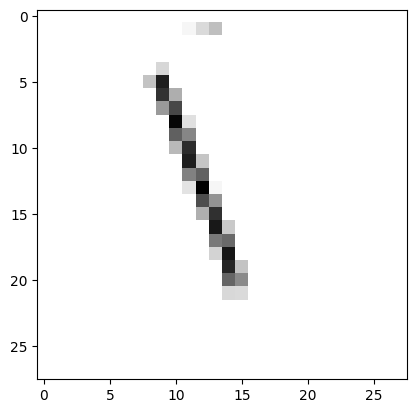

1/1 [==============================] - 0s 18ms/step
This digit is probably a 9


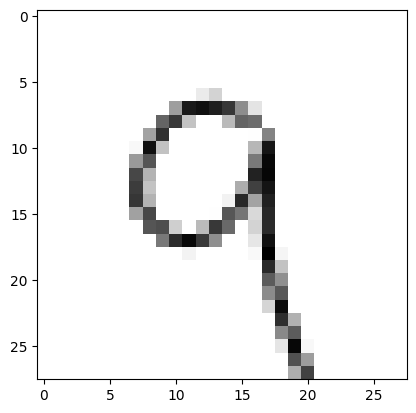

1/1 [==============================] - 0s 22ms/step
This digit is probably a 3


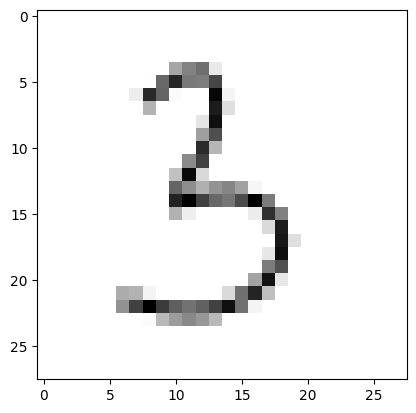

1/1 [==============================] - 0s 22ms/step
This digit is probably a 4


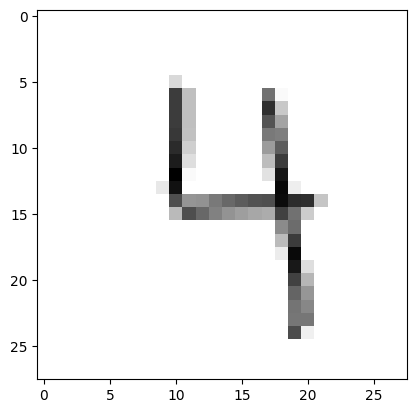

1/1 [==============================] - 0s 22ms/step
This digit is probably a 3


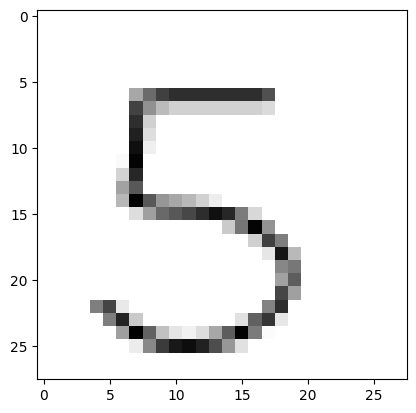

1/1 [==============================] - 0s 19ms/step
This digit is probably a 2


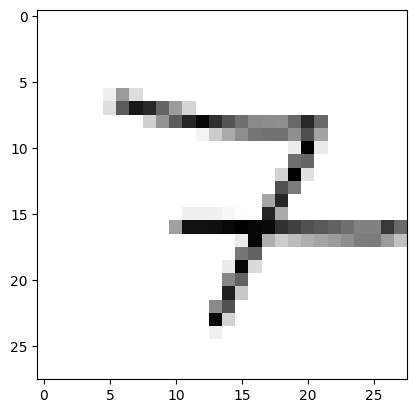

In [77]:
plt.figure(figsize=(10,10))

while os.path.isfile(f'/content/drive/MyDrive/digits/digit{image_num}.png'):
  try:
      img = cv2.imread(f'/content/drive/MyDrive/digits/digit{image_num}.png')[:, :, 0]
      img = np.invert(np.array([img]))  # Corrected the syntax error here
      prediction = model.predict(img)
      print(f"This digit is probably a {np.argmax(prediction)}")
      plt.imshow(img[0], cmap=plt.cm.binary)
      plt.show()
  except:
    print('Error')
  finally:
    image_num +=1